# Strar Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. This is their main question: 
**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

They started to collect data using the online tool SurveyMonkey. They received 835 total responses. The result is available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

We are going to read and clean data and then figure out the movies with the highest ranking and views based on gender, education, location, and being fans or not-fans. We are also going to find out which character the respondents like and dislike and which one is controversial.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

The data has several columns, including:

- **RespondentID** - An anonymized ID for the respondent (the person taking the survey)
- **Gender** - The respondent's gender
- **Age** - The respondent's age
- **Household Income** - The respondent's income
- **Education** - The respondent's education level
- **Location (Census Region)** - The respondent's location
- **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response
- **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Data Cleaning
Let's start data cleaning by removing invalid rows and convering the type of some columns if required.

### Remove invalid rows
RespondentID is supposed to be a unique ID for each respondent, but by looking at the above table it's blank or Nan in some rows. Let's remove any rows with an invalid RespondentID.

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

### Convert some columns to boolean
Working with boolean columns is easier so we are going to convert some of the columns. To convert the following two columns to boolean we need to convert Yes to True and No to False:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

In [3]:
yes_no = {
    "Yes": True,
    "No": False
}
column_names = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
]
for col in column_names:
    star_wars[col] = star_wars[col].map(yes_no)
    #star_wars[col] = star_wars[col].astype('bool')
    print("{}:\n{}".format(col, star_wars[col].value_counts(dropna = False)))
    print("*************")

Have you seen any of the 6 films in the Star Wars franchise?:
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
*************
Do you consider yourself to be a fan of the Star Wars film franchise?:
True     552
True     350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
*************


The following columns represent a single checkbox question. So we need to convert Nan to False and the name of the movie to True.

- **Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- **Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- **Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- **Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- **Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- **Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

In [4]:
import numpy as np
#A list of column names
columns = star_wars.columns[3:9]
# A dictionary for the conversion of each column:
conversion = {
    columns[0]: {
    "Star Wars: Episode I  The Phantom Menace": True,
      np.NaN: False  
    },
    columns[1]: {
      'Star Wars: Episode II  Attack of the Clones': True,
      np.NaN: False
    },
    columns[2]: {
      'Star Wars: Episode III  Revenge of the Sith': True,
      np.NaN: False
    },
    columns[3]: {
      'Star Wars: Episode IV  A New Hope': True,
      np.NaN: False
    },
    columns[4]: {
      'Star Wars: Episode V The Empire Strikes Back': True,
      np.NaN: False
    },
    columns[5]: {
      'Star Wars: Episode VI Return of the Jedi': True,
      np.NaN: False
    }    
}

# Convert the values of the column to True or False and print the counts of each
for col in columns:
    star_wars[col] = star_wars[col].map(conversion[col])
    print(star_wars[col].value_counts(dropna = False))
    print('***************')


True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
***************
False    615
True     571
Name: Unnamed: 4, dtype: int64
***************
False    636
True     550
Name: Unnamed: 5, dtype: int64
***************
True     607
False    579
Name: Unnamed: 6, dtype: int64
***************
True     758
False    428
Name: Unnamed: 7, dtype: int64
***************
True     738
False    448
Name: Unnamed: 8, dtype: int64
***************


In [5]:
## Rename columns
renamed_columns = {}
for i in range(6):
    renamed_columns[columns[i]] = 'seen_{}'.format(i+1) 
star_wars = star_wars.rename(columns = renamed_columns)
print(star_wars.columns[3:9])    

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


### Numeric conversion of some columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace

- **Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones
- **Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- **Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope
- **Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- **Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We need to change the column types to float and their names to something easier.

In [6]:
columns = star_wars.columns[9:15]
#Convert to float
star_wars[columns] = star_wars[columns].astype(float)

#Rename the columns' names
renamed_columns = {}
for i in range(6):
    renamed_columns[columns[i]] = 'ranking_{}'.format(i+1) 
star_wars = star_wars.rename(columns = renamed_columns)
print(star_wars.columns[9:15])  

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


## Analysis
Since cleaning up data is done, Let's start analysis.

### Ranking
We have the ranking data for each movie so it is time to find the most favorite movie. 

Text(0.5, 1.0, 'Ranking for each movie')

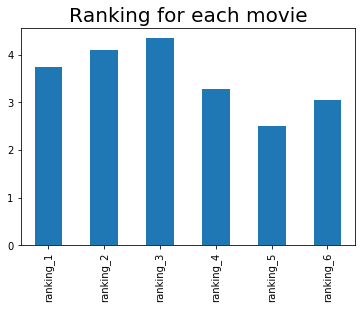

In [7]:
rankings = star_wars.iloc[:,9:15]
ranking_means = rankings.mean()
%matplotlib inline
ax = ranking_means.plot.bar()
ax.set_title('Ranking for each movie', fontdict={'fontsize':20})



The most favorite movie is the fifth movie which is called **Star Wars: Episode V The Empire Strikes Back**. The star wars episode 6 and 4 are the most favorite after Episode 5. The third episode is the least favorite one.

### The number of views
We cleaned up the seen columns and converted their values to the Boolean type. Now we can figure out how many people have seen each moviie.

Text(0.5, 1.0, 'Number of seen for each movie')

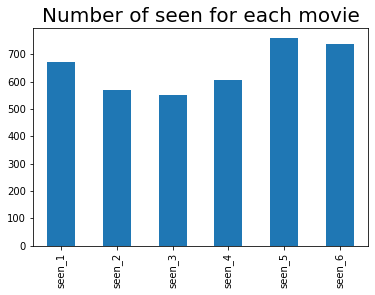

In [8]:
seens = star_wars.iloc[:,3:9]
seens_sum = seens.sum()
ax = seens_sum.plot.bar()
ax.set_title('Number of seen for each movie', fontdict={'fontsize':20})

The highest number of seen goes to Episode 5. Episode 6 attracts the highest number of watching after episode 5 and then it is Episode 1.

The above plots show that movies with low rankings which mean high favorite attract more views which is reasonable. They also show that after the first episode which has a good number of views and low ranking, the popularity went down in Episode 2 and 3 but it came back up in Episode 4 and reached the highest popularity in episode 5 but decreased a little again in Episode 6.

### Segment data to groups
 There are several columns that segment our data into two groups. Here are a few examples:

- **Do you consider yourself to be a fan of the Star Wars film franchise?** - True or False
- **Do you consider yourself to be a fan of the Star Trek franchise?** - Yes or No
- **Gender** - Male or Female

We are going to split the dataframe into two groups using the above columns separately and then find the most favorite, and the most seen movie for each subset.

### Gender

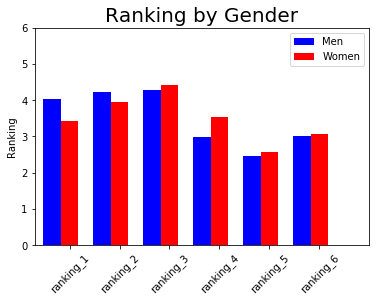

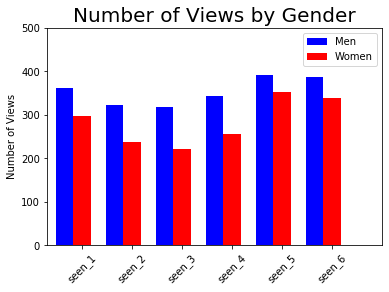

In [9]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

import matplotlib.pyplot as plt
from numpy import arange

# This function receives two series as imputs and 
# draw bar chart for both in the same plot.
def bar_chart(s1, s2, yLabel, ylim, title, legend1, legend2):    
    fig, ax = plt.subplots()
    width = 0.35
    ind = arange(6)
    b1 = ax.bar(ind, s1, width, color='blue')
    b2 = ax.bar(ind+width, s2, width, color = 'red')

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(0,ylim)
    ax.set_ylabel(yLabel)
    ax.set_title(title, fontdict={'fontsize':20})
    xTickMarks = s1.index
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)

    ## add a legend
    ax.legend( (b1[0], b2[0]), (legend1, legend2) )
    plt.show()
    
#Draw Ranking by Gender bar chart
bar_chart(males.iloc[:,9:15].mean(), females.iloc[:,9:15].mean(),
         'Ranking',6, 'Ranking by Gender', 'Men', 'Women')
#Draw Number of Views bar chart
bar_chart(males.iloc[:,3:9].sum(),females.iloc[:,3:9].sum(),
         'Number of Views', 500, 'Number of Views by Gender', 'Men', 'Women')


The above bar charts demonstrate the following results with this note that lower rank means higher favorite:

1. The most favorite movie in both genders is Episode 5 and the highest number of views in both genders is Episode 5.
2. Women's views are less than men for all movies but with the same ratio.
3. The average rank that women have given to the first two episodes is less than the rank of men but from Episode 3, women's ranks are more than men's.
4. Each movie with a larger number of views has less rank in both genders.

### Fan of the Star Wars film franchise
We are going to draw similar charts for fans and not-fans of star wars movies.

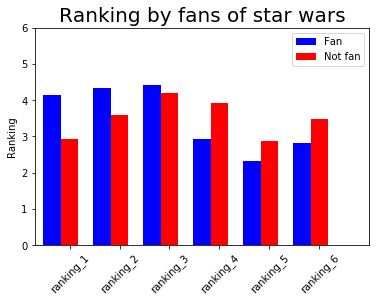

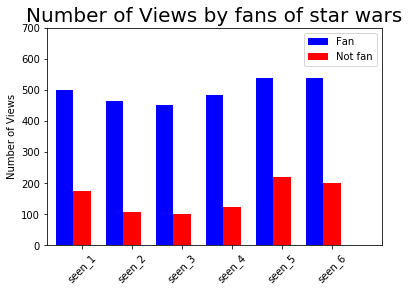

In [10]:
fan_sta_wars_col = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
fan_star_wars = star_wars[star_wars[fan_sta_wars_col] == True]
not_fan_star_wars = star_wars[star_wars[fan_sta_wars_col] == False]

#Draw Ranking by fans of star wars
bar_chart(fan_star_wars.iloc[:,9:15].mean(), not_fan_star_wars.iloc[:,9:15].mean(),
         'Ranking',6, 'Ranking by fans of star wars', 'Fan', 'Not fan')
#Draw Number of Views by fans of star wars bar chart
bar_chart(fan_star_wars.iloc[:,3:9].sum(), not_fan_star_wars.iloc[:,3:9].sum(),
         'Number of Views', 700, 'Number of Views by fans of star wars', 'Fan', 'Not fan')

Looking at the above charts we find out:

1. Fans apparently see the movies much more than not-fans but not-fans ranked lower in the first three episodes. It may indicate that the filmmakers have made lots of changes from the first three episodes that were more attractive for fans.
2. The lowest rank and most views are in Episode 5 for fans and not-fans.
3. For fans of start wars, the number of views of Episode 6 and 5 are the same.

### Fan of the Star Trek franchise

We are going to go through the same analysis based on being the fan or not-fan of Star Trek.Star Trek is an American media franchise based on the science fiction television series created by Gene Roddenberry.

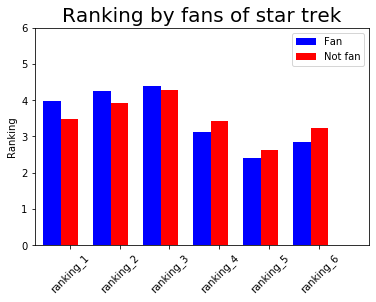

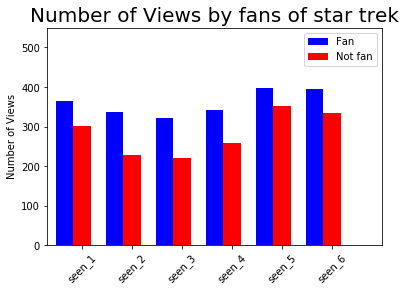

In [11]:
fan_star_trek_col = 'Do you consider yourself to be a fan of the Star Trek franchise?'
fan_star_trek = star_wars[star_wars[fan_star_trek_col] == 'Yes']
not_fan_star_trek = star_wars[star_wars[fan_star_trek_col] == 'No']

#Draw Ranking by fans of star wars
bar_chart(fan_star_trek.iloc[:,9:15].mean(), not_fan_star_trek.iloc[:,9:15].mean(),
         'Ranking',6, 'Ranking by fans of star trek', 'Fan', 'Not fan')
#Draw Number of Views by fans of star trek bar chart
bar_chart(fan_star_trek.iloc[:,3:9].sum(), not_fan_star_trek.iloc[:,3:9].sum(),
         'Number of Views', 550, 'Number of Views by fans of star trek', 'Fan', 'Not fan')

The difference between the views of the fans of trek and not-fans is much less than the fans and not-fans of star wars. The lowest rank is still Episode 5 and the highest number of views is for Episode 5.

## Education
Let's see the values of the Education column and then try to draw the same charts based on Education.

In [12]:
star_wars['Education'].value_counts(dropna = False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

There are five categories in the Education column. It is required to contact the ranking columns to be able to use the seaborn bar plot and show all categories in the same bar plot.

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def concat_columns(df, group_col, agg_func, result_col):
    rank_col_names = df.columns
    grouped_education = star_wars.groupby(group_col)[rank_col_names].agg(agg_func)
    grouped_education.reset_index(inplace=True)

    # print(grouped_education)
    # print('\n ******************')
    r = pd.DataFrame()

    for col in rank_col_names:
        rt = grouped_education[[group_col, col]]

        rt = rt.rename(columns={col: agg_func}).copy()
        rt[result_col] = col
        if r.empty == True:
            r = rt
        else:
            r = pd.concat([r, rt])
    return r
r = concat_columns(star_wars.iloc[:,9:15], 'Education', 'mean', 'ranking')
print(r)


                          Education      mean    ranking
0                   Bachelor degree  3.828244  ranking_1
1                   Graduate degree  3.822222  ranking_1
2                High school degree  3.802817  ranking_1
3      Less than high school degree  5.000000  ranking_1
4  Some college or Associate degree  3.551181  ranking_1
0                   Bachelor degree  4.290076  ranking_2
1                   Graduate degree  4.225664  ranking_2
2                High school degree  3.746479  ranking_2
3      Less than high school degree  5.333333  ranking_2
4  Some college or Associate degree  3.885827  ranking_2
0                   Bachelor degree  4.521073  ranking_3
1                   Graduate degree  4.500000  ranking_3
2                High school degree  4.126761  ranking_3
3      Less than high school degree  3.666667  ranking_3
4  Some college or Associate degree  4.102362  ranking_3
0                   Bachelor degree  3.114504  ranking_4
1                   Graduate de

The above result shows the result of concating, now we can use the result to draw the seaborn bar plot.

Text(0.5, 1.0, 'Ranking by Education')

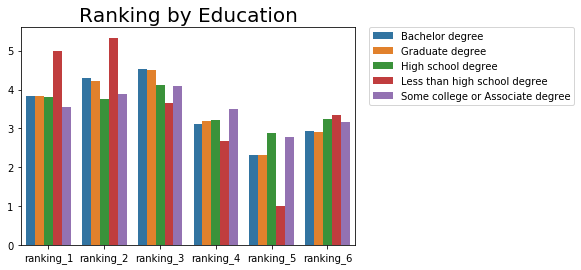

In [14]:
import seaborn as sns
ax = sns.barplot(x="ranking", hue="Education", y="mean", data=r)
ax.set_ylabel("")
ax.set_xlabel("")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
ax.set_title('Ranking by Education', fontdict={'fontsize':20})

The plot shows:

1. The lowest rank which means the most favorite movie is Episode 5 in all degrees.
2. Respondents with Less than high school degrees rank the first two episodes higher than the other episodes. The rest of degrees ranked the Episode 3 higher than the others. It seems the ranking of Less than high school degree varies a lot than the other degrees.
3. The ranks of Bachelor and Graduate students are very close to each other. The rank of high school and college students are also similar.
4. The bachelor and graduate degrees ranked the last three Episodes lower than High school and college degrees but vice versa in the first three Episode.

In [15]:
r = concat_columns(star_wars.iloc[:,3:9], 'Education', 'sum', 'seen')
print(r)

                          Education    sum    seen
0                   Bachelor degree  206.0  seen_1
1                   Graduate degree  179.0  seen_1
2                High school degree   57.0  seen_1
3      Less than high school degree    3.0  seen_1
4  Some college or Associate degree  211.0  seen_1
0                   Bachelor degree  170.0  seen_2
1                   Graduate degree  149.0  seen_2
2                High school degree   48.0  seen_2
3      Less than high school degree    3.0  seen_2
4  Some college or Associate degree  186.0  seen_2
0                   Bachelor degree  163.0  seen_3
1                   Graduate degree  139.0  seen_3
2                High school degree   48.0  seen_3
3      Less than high school degree    3.0  seen_3
4  Some college or Associate degree  183.0  seen_3
0                   Bachelor degree  195.0  seen_4
1                   Graduate degree  163.0  seen_4
2                High school degree   53.0  seen_4
3      Less than high school de

Text(0.5, 1.0, 'Number of Views by Education')

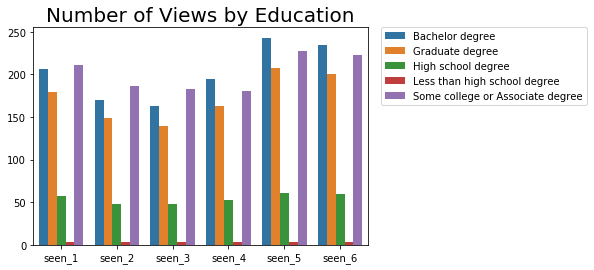

In [16]:
ax = sns.barplot(x="seen", hue="Education", y="sum", data=r)
ax.set_ylabel("")
ax.set_xlabel("")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
#ax.set_ylim(0, 370)
ax.set_title('Number of Views by Education', fontdict={'fontsize':20})

The above plot shows that:

1. the number of views in Episode 5 is more than the others. 
2. The most views in the first three episodes is for college degrees but in the last three episodes, it is for bachelor students.
3. The least views are for less than high school degree 
4. Since the number of views for Less than High school is too low, maybe the data about the ranking for this degree is not reliable.

## Location (Census Region)
It is helful to see how respondents fron different locations may have different ideas about the movies.

In [17]:
star_wars['Location (Census Region)'].value_counts(dropna = False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

Text(0.5, 1.0, 'Ranking by Location')

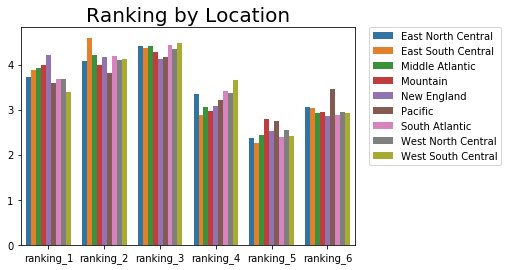

In [18]:
r = concat_columns(star_wars.iloc[:,9:15], 'Location (Census Region)', 'mean', 'ranking')
ax = sns.barplot(x="ranking", hue="Location (Census Region)", y="mean", data=r)
ax.set_ylabel("")
ax.set_xlabel("")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
ax.set_title('Ranking by Location', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Number of Views by Location')

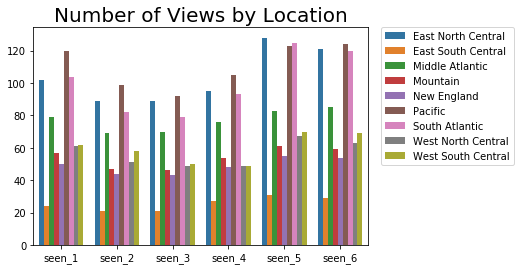

In [19]:
r = concat_columns(star_wars.iloc[:,3:9], 'Location (Census Region)', 'sum', 'seen')
ax = sns.barplot(x="seen", hue="Location (Census Region)", y="sum", data=r)
ax.set_ylabel("")
ax.set_xlabel("")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
ax.set_title('Number of Views by Location', fontdict={'fontsize':20})

1. The highest number of views are in East North Central, South Atlantic, and Pacific. 
2. The least number of views is in East South Central.
3. While the number of views varies a lot in different locations, ranking is mostly close to each other and the lowest rank is in Episode 5.

## Which character shot first?
Acconring to this [reference](https://en.wikipedia.org/wiki/Han_shot_first#:~:text=%22Han%20shot%20first%22%20refers%20to,scene%2C%20Han%20shoots%20Greedo%20dead.) of Wikipedia. this question refers to a controversial change made to a scene in the science fiction action film Star Wars (1977), in which Han Solo (Harrison Ford) is confronted by the bounty hunter Greedo (Paul Blake) in the Mos Eisley cantina. In the original version of the scene, Han shoots Greedo dead. Later versions are edited so that Greedo attempts to fire at Han first. Director George Lucas altered the scene to give Solo more justification for acting in self-defense. Many fans and commentators oppose the change, feeling it weakens Solo's character. The controversy is referenced in the 2018 film Solo: A Star Wars Story.

According to what does the respondent answers this question, we are going to figure out the most favorite movie and the movie with the highest number of views.

In [20]:
star_wars['Which character shot first?'].value_counts(dropna = False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

Text(0.5, 1.0, 'Ranking by character')

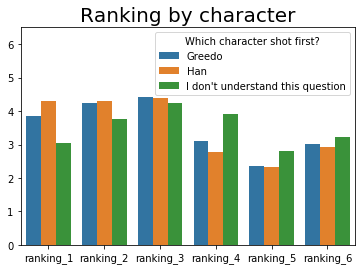

In [21]:
r = concat_columns(star_wars.iloc[:,9:15], 'Which character shot first?', 'mean', 'ranking')
ax = sns.barplot(x="ranking", hue="Which character shot first?", y="mean", data=r)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_ylim(0,6.5)
ax.set_title('Ranking by character', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Number of Views by Charecter')

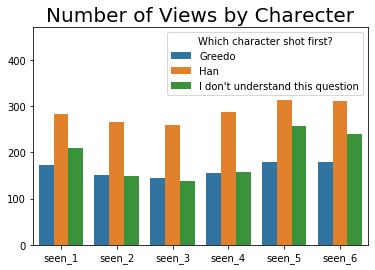

In [22]:
r = concat_columns(star_wars.iloc[:,3:9], 'Which character shot first?', 'sum', 'seen')
#fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="seen", hue="Which character shot first?", y="sum", data=r)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_ylim(0, 470)
ax.set_title('Number of Views by Charecter', fontdict={'fontsize':20})

Those who say that Han shot first apparently have significantly more views and lower rank than the others.
Except for two first Episodes, In the Other Episodes those who says Han shot first ranked the episodes lower
Comparing these plots with the plots for fans and not-fans of star wars it seems that the ranking and the number of views of those who don't understand the meaning of the question are similar to the not-fans of start wars. So we can conclude that most of the fans of star wars think Han shot first.

## Favorable characters
It is a good idea to clean up columns 15 to 29 to find the answers to the following questions:

- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?

Let's look at the columns' names:

In [23]:
print(star_wars.iloc[:,15:29].columns)

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


The Unnamed columns refer to the following characters:

- **Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.**: Han Solo
- **Unnamed: 16**: Luke Skywalker
- **Unnamed: 17**: Princess Leia Organa
- **Unnamed: 18**: Anakin Skywalker
- **Unnamed: 19**: Obi Wan Kenobi
- **Unnamed: 20**: Emperor Palpatine
- **Unnamed: 21**: Darth Vader
- **Unnamed: 22**: Lando Calrissian
- **Unnamed: 23**: Boba Fett
- **Unnamed: 24**: C-3P0
- **Unnamed: 25**: R2 D2
- **Unnamed: 26**: Jar Jar Binks
- **Unnamed: 27**: Padme Amidala
- **Unnamed: 28**: Yoda

Let's look at the data of these columns.

In [24]:
star_wars.iloc[:,15].value_counts(dropna = False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

All of the columns have similar data. We are going to map the values to like, dislike, and controversial, using the following map instruction:

- Very favorably -> like
- Somewhat favorably -> like
- Neither favorably nor unfavorably (neutral) -> controversial
- Somewhat unfavorably -> dislike
- Very unfavorably -> dislike
- Unfamiliar (N/A) -> Nan

In [25]:
def cat_like(item):
    if type(item) == float:
        item = str(item)
    item = item.strip()
    if item =='Unfamiliar (N/A)':
        return np.nan
    elif (item == 'Very favorably' or item == 'Somewhat favorably'):
        return 'like'
    elif (item == 'Very unfavorably' or item == 'Somewhat unfavorably'):
        return 'dislike'
    elif item == 'nan':
        return np.nan
    else:
        return 'controversial'
star_wars.iloc[:,15:30] = star_wars.iloc[:,15:30].applymap(cat_like)

Since the column names are not so meaningful, we are going to change them to character_ and proceeds with a number. To Make it easier we are going to keep the exact number following Unnamed for that column.

In [26]:
columns = star_wars.columns[15:29]
#Rename the columns' names
renamed_columns = {}
for i in range(14):
    renamed_columns[columns[i]] = 'character_{}'.format(i+15) 
star_wars = star_wars.rename(columns = renamed_columns)
print(star_wars.columns[15:29])

Index(['character_15', 'character_16', 'character_17', 'character_18',
       'character_19', 'character_20', 'character_21', 'character_22',
       'character_23', 'character_24', 'character_25', 'character_26',
       'character_27', 'character_28'],
      dtype='object')


At this step, we are going to concat the characters' columns and add an extra column containing the count of like, dislike, and controversial for each character. 

In [27]:
r = pd.DataFrame()

df = star_wars.iloc[:,15:29]
rank_col_names = df.columns

for col in rank_col_names:
    rt = pd.DataFrame()
    rt[col] = df[col]
    rt = rt.rename(columns={col: 'cat_like'}).copy()
    rt['character'] = col
    if r.empty == True:
        r = rt
    else:
        r = pd.concat([r, rt])
        
grouped_character = r.groupby(['character', 'cat_like'])['cat_like'].agg('count')
result = r.groupby(['character', 'cat_like']).agg('count').reset_index()
result['count'] = grouped_character[:].values

print(result)

       character       cat_like  count
0   character_15  controversial     44
1   character_15        dislike      9
2   character_15           like    761
3   character_16  controversial     38
4   character_16        dislike     16
5   character_16           like    771
6   character_17  controversial     48
7   character_17        dislike     18
8   character_17           like    757
9   character_18  controversial    135
10  character_18        dislike    122
11  character_18           like    514
12  character_19  controversial     43
13  character_19        dislike     15
14  character_19           like    750
15  character_20  controversial    213
16  character_20        dislike    192
17  character_20           like    253
18  character_21  controversial     84
19  character_21        dislike    251
20  character_21           like    481
21  character_22  controversial    236
22  character_22        dislike     71
23  character_22           like    365
24  character_23  controv

Now we can draw the bar chart and compare the characters.

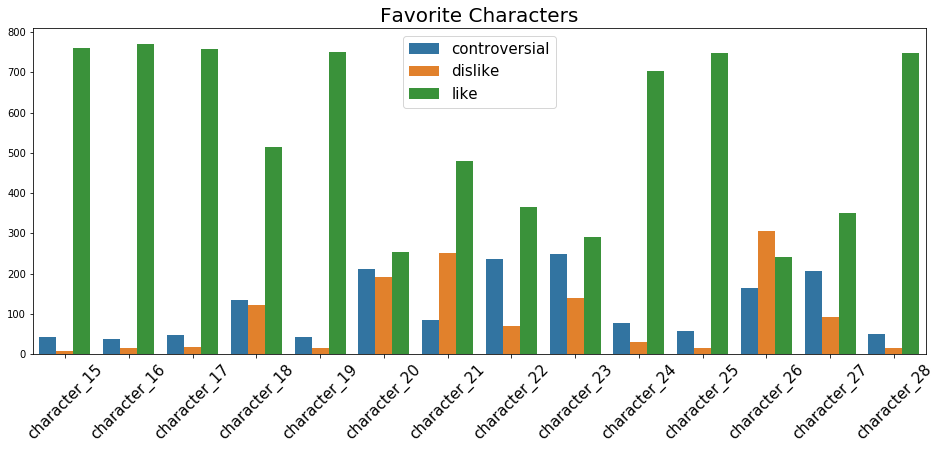

In [28]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.barplot(x="character", hue="cat_like", y="count", data=result)
ax.set_ylabel("")
ax.set_xlabel("")
#ax.set_ylim(0,7)
ax.set_title('Favorite Characters', fontdict={'fontsize':20})
plt.xticks(rotation = 45, fontsize = 15)
plt.legend(fontsize = 15, loc = 'upper center')


- **Like**: Character 16, **Luke Skywalker** is the most favorite character. The votes for *Han Solo* and *Princess Leia Organa* are very close to Luke Skywalker but after him.
- **Dislike**: The respondents dislike character 26, **Jar Jar Binks** the most.
- **Controversial**: The most controversial character is character 23, **Boba Fett**.

## Conclusion:
It seems that the answer to the main question which was **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?** is yes since in all the bar charts the most favorite movie and the movie with the highest number of views was Episode 5.
These groups have the highest number of views of Episode 5 and the least ranked (Most favorite):

- Women
- Fans
- Bachelor and Graduate degrees
- East South Central
- Han shot first

We figured out that the most favorite character is *Luke Skywalker*. The votes for *Han Solo* and *Princess Leia Organa* are very close to Luke Skywalker. The respondents dislike *Jar Jar Binks* the most and the most controversial one is *Boba Fett*. 